## EDA: Ted Talks data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Who will be the most popular highest rating?
# what is ted talk trend?

In [20]:
transcript = pd.read_csv('D:/repos/scraping_data_from_web/data_tedtalk/transcripts.csv')
transcript

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...
...,...,...
2462,"So, Ma was trying to explain something to me a...",https://www.ted.com/talks/duarte_geraldino_wha...
2463,This is a picture of a sunset on Mars taken by...,https://www.ted.com/talks/armando_azua_bustos_...
2464,"In my early days as a graduate student, I went...",https://www.ted.com/talks/radhika_nagpal_what_...
2465,I took a cell phone and accidentally made myse...,https://www.ted.com/talks/theo_e_j_wilson_a_bl...


In [5]:
tedtalk = pd.read_csv('D:/repos/scraping_data_from_web/data_tedtalk/ted_main.csv')
tedtalk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [18]:
tedtalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [ ]:
tedtalk = tedtalk.drop(columns=['languages','film_date','published_date','num_speaker'])
tedtalk

KeyError: "['languages', 'film_date', 'published_date', 'num_speaker'] not found in axis"

In [ ]:
# Rating analysis
import ast

# Apply ast.literal_eval only if the value is a string
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except Exception as e:
            print(f"Error parsing: {val}\n{e}")
            return None
    return val

tedtalk['ratings'] = tedtalk['ratings'].apply(safe_eval)

from collections import defaultdict

def extract_ratings(rating_list):
    rating_counts = defaultdict(int)
    if isinstance(rating_list, list):
        for rating in rating_list:
            rating_counts[rating['name']] = rating['count']
    return pd.Series(rating_counts)

ratings_df = tedtalk['ratings'].apply(extract_ratings).fillna(0).astype(int)
tedtalk = pd.concat([tedtalk.drop(columns='ratings'), ratings_df], axis=1)

In [33]:
tedtalk

,comments,description,duration,event,main_speaker,name,related_talks,speaker_occupation,tags,title,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,Ken Robinson,Ken Robinson: Do schools kill creativity?,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,Al Gore,Al Gore: Averting the climate crisis,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,...,113,62,443,132,258,268,116,203,131,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,David Pogue,David Pogue: Simplicity sells,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,...,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,Majora Carter,Majora Carter: Greening the ghetto,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,...,53,32,380,132,36,460,230,85,35,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,Hans Rosling,Hans Rosling: The best stats you've ever seen,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,...,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,"[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,...,3,2,33,8,12,24,14,0,1,27
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,"[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,...,0,0,38,32,1,7,8,13,0,20
2547,10,Science fiction visions of the future show us ...,651,TED2017,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,"[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,...,0,5,32,24,1,3,1,4,0,30
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,"[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,...,3,1,75,39,6,65,7,5,7,147


In [36]:
tedtalk['speaker_occupation'].value_counts()

speaker_occupation
Writer                  45
Artist                  34
Designer                34
Journalist              33
Entrepreneur            31
                        ..
Science author           1
Pro snowboarder          1
Artist, urban farmer     1
Entrepreneur, author     1
 Robotics engineer       1
Name: count, Length: 1458, dtype: int64

In [39]:
# Top 10 Most Viewed Talks
top_views = tedtalk.sort_values(by='views', ascending=False)[['title', 'main_speaker']].head(10)
print(top_views)

                                                  title       main_speaker
0                           Do schools kill creativity?       Ken Robinson
1346           Your body language may shape who you are          Amy Cuddy
677                    How great leaders inspire action        Simon Sinek
837                          The power of vulnerability        Brené Brown
452              10 things you didn't know about orgasm         Mary Roach
1776         How to speak so that people want to listen    Julian Treasure
201                                My stroke of insight  Jill Bolte Taylor
5                                  Why we do what we do       Tony Robbins
2114  This is what happens when you reply to spam email       James Veitch
1416  Looks aren't everything. Believe me, I'm a model.    Cameron Russell


In [47]:
# Only parse if it's a string
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except Exception as e:
            print(f"Error parsing: {val}\n{e}")
            return []
    return val

tedtalk['tags'] = tedtalk['tags'].apply(safe_eval)

from itertools import chain
from collections import Counter

all_tags = list(chain.from_iterable(tedtalk['tags']))
top_tags = Counter(all_tags).most_common(10)

print(f'The top 10 most common tags in TedTalk dataset')
for each in top_tags:
    print(f'{each[0]} with {each[1]} tags')

The top 10 most common tags in TedTalk dataset
technology with 727 tags
science with 567 tags
global issues with 501 tags
culture with 486 tags
TEDx with 450 tags
design with 418 tags
business with 348 tags
entertainment with 299 tags
health with 236 tags
innovation with 229 tags


In [48]:
# Top 10 most Inspiring TedTalk
top_inspiring = tedtalk.sort_values(by='Inspiring', ascending=False)[['title', 'main_speaker']].head(10)
print(top_inspiring)

                                                title  \
0                         Do schools kill creativity?   
677                  How great leaders inspire action   
837                        The power of vulnerability   
1346         Your body language may shape who you are   
1030                       How to live before you die   
201                              My stroke of insight   
1916  Why we all need to practice emotional first aid   
1129                  The happy secret to better work   
1163                          The power of introverts   
530                      The danger of a single story   

                  main_speaker  
0                 Ken Robinson  
677                Simon Sinek  
837                Brené Brown  
1346                 Amy Cuddy  
1030                Steve Jobs  
201          Jill Bolte Taylor  
1916                 Guy Winch  
1129               Shawn Achor  
1163                Susan Cain  
530   Chimamanda Ngozi Adichie  


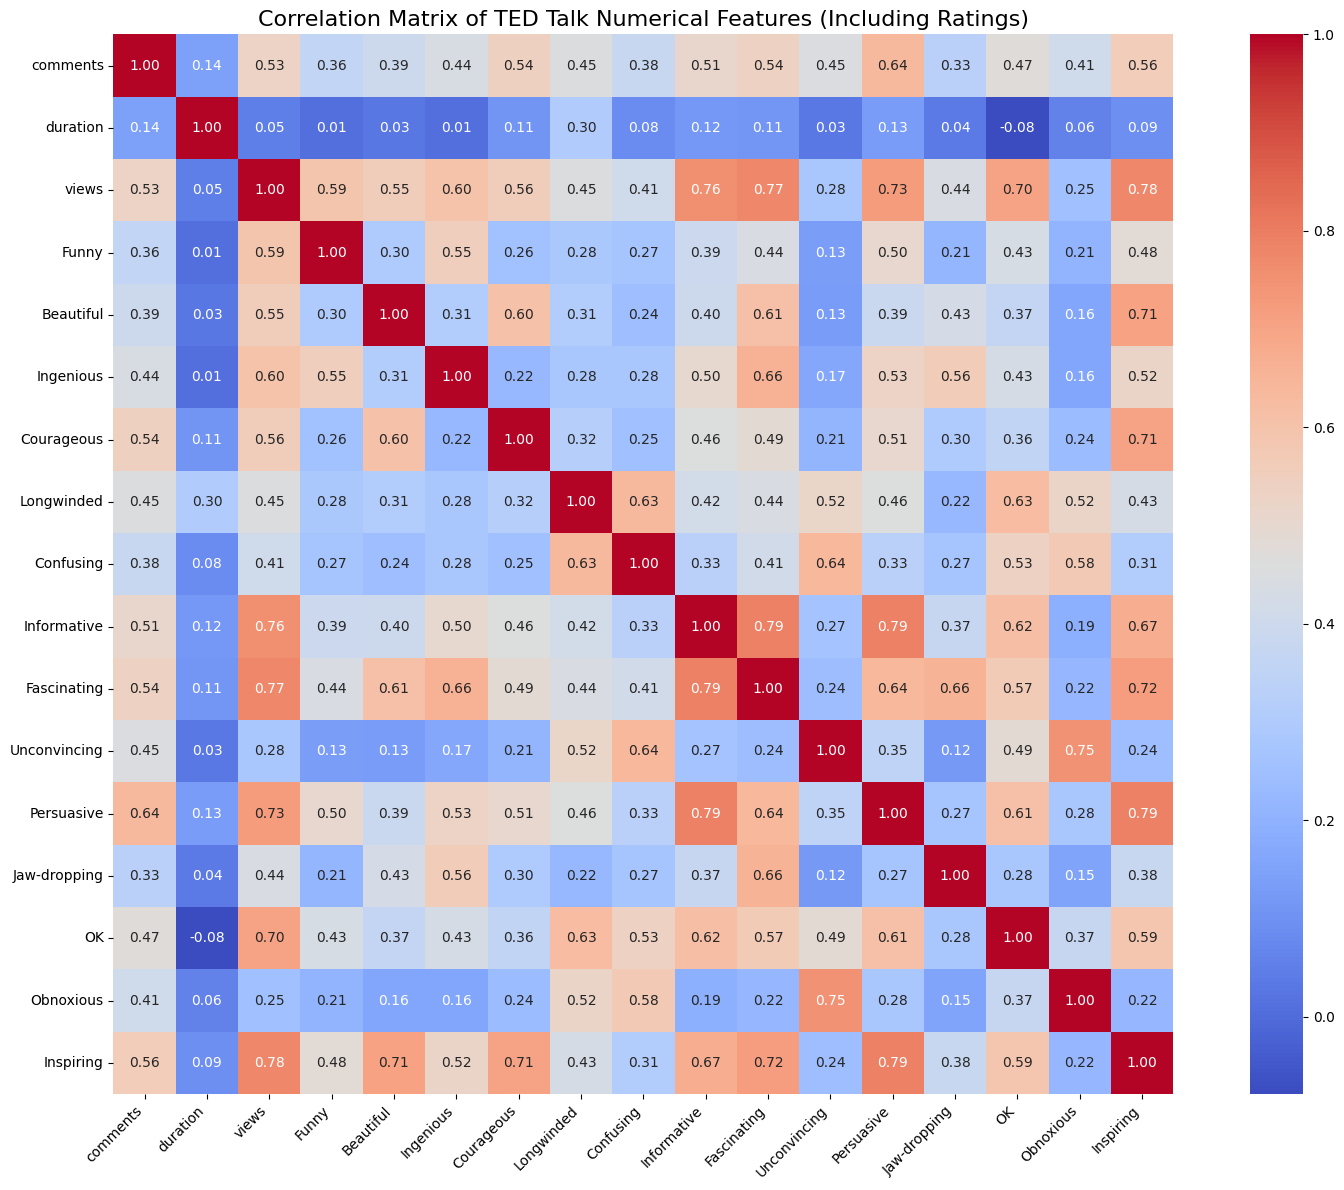

In [50]:
# Select relevant numerical columns for correlation
numerical_cols = tedtalk.select_dtypes(include=['int64', 'int32']).columns

# Compute correlation matrix
corr_matrix = tedtalk[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of TED Talk Numerical Features (Including Ratings)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Comment: As we can see from the heatmap that, the more interesting and useful information, the MORE VIEWS it will get.

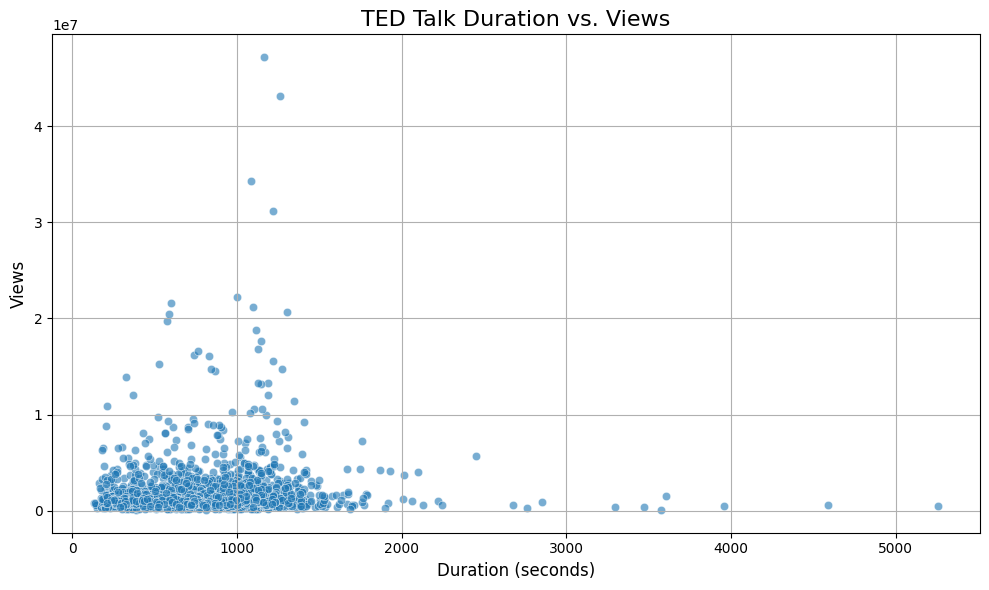

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tedtalk, x='duration', y='views', alpha=0.6)

plt.title('TED Talk Duration vs. Views', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Comment: No strong correlation between Duration and Views